In [1]:
#Pandasとseabornをインポート
import pandas as pd
import seaborn as sns

#対象データの取得
from sklearn.datasets import load_wine

#変数に代入
dataset = load_wine()
dataset

#活用するデータの確認
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [2]:
#データの値を確認
df = load_wine(as_frame=True).frame
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
#全データ数は178行
df.shape

(178, 14)

In [4]:
#各要素の標準化
#StandardScalerクラスのインポートとインスタンス化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#全データを変数Xに代入し、引数に指定してfitメソッドを実行
X = df.to_numpy()
scaler.fit(X)

StandardScaler()

In [5]:
#clusterモジュールの KMeansクラスをインポート
from sklearn.cluster import KMeans

#KMeansクラスをインスタンス化
#クラスター数は、分析者本人が試行錯誤しながら決めるもの
#まずは教科書通りに4で設定
model = KMeans(n_clusters=4, random_state=0)

#クラスタリングを実行
model.fit(X)

KMeans(n_clusters=4, random_state=0)

In [6]:
#model.labels_で、属するクラスターのラベルを確認
model.labels_

#4つのクラスターに分けたため、ラベル「0」「1」「2」「3」のいずれかが出力

array([1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [7]:
#クラスター列としてラベル情報を追加
df['クラスター'] = model.labels_
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,クラスター
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,3
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2


<Axes: xlabel='クラスター', ylabel='count'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12463 (\N{KATA

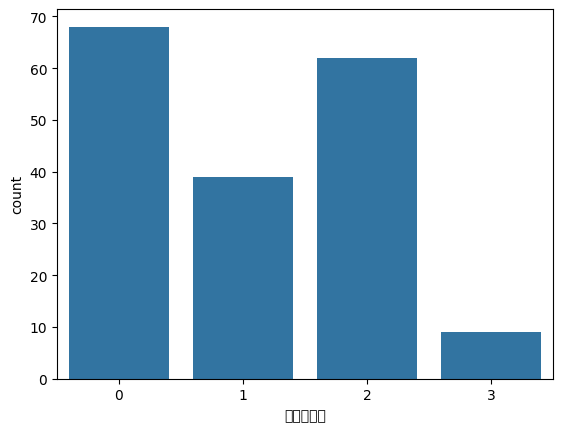

In [8]:
#クラスタリング結果に対する考察
#4つのクラスターがそれぞれ、どの程度のデータ数を保持しているか確認
sns.countplot(x='クラスター', data=df)

In [9]:
#クラスター別の平均値の比較
#Pandasのgroupbyメソッドを利用して、平均値を出力
df.groupby('クラスター').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
クラスター,,,,,,,,,,,,,,
0,12.511912,2.487353,2.283824,20.776471,92.220588,2.067059,1.775441,0.388088,1.461324,4.074706,0.941912,2.495735,456.294118,1.264706
1,13.725897,1.887436,2.409487,17.210256,106.641026,2.802051,2.936410,0.285128,1.918462,5.333846,1.066667,3.131026,1126.205128,0.051282
2,12.935806,2.527258,2.414677,19.970968,102.612903,2.108226,1.557097,0.391774,1.463548,5.687742,0.879613,2.357742,722.741935,1.274194
3,13.996667,1.825556,2.473333,16.433333,106.888889,3.108889,3.268889,0.290000,2.027778,6.955556,1.137778,2.986667,1465.222222,0.000000


<Axes: xlabel='malic_acid', ylabel='proline'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12463 (\N{KATA

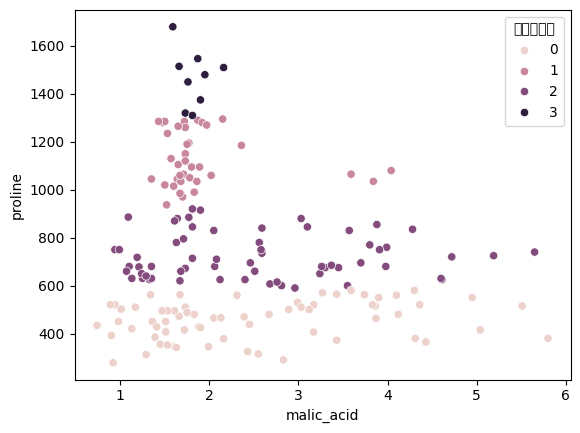

In [10]:
#malic_acidが低いと、prolineが高い？
#各データをmalic_acidとprolineでマッピング

#seabornのscatterplot関数を利用
#hueパラメータにクラスターという列名を指定し、クラスター別の色分け
sns.scatterplot(x='malic_acid', y='proline', hue='クラスター', data=df)

<Axes: xlabel='malic_acid', ylabel='proline'>

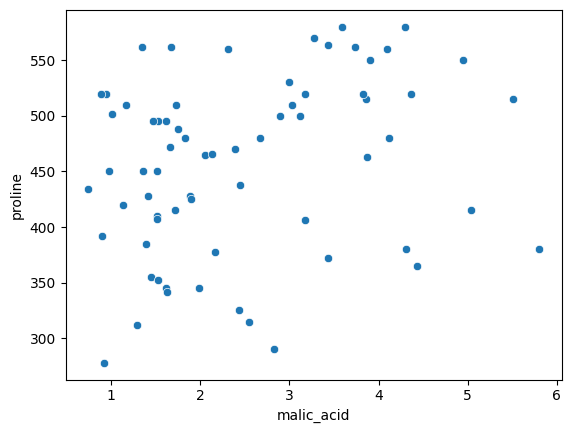

In [15]:
#特定のクラスターに的を絞った深掘り
#queryメソッドを活用して特定のクラスターのみを抽出し、改めて散布図で表現
df_cluster0 = df.query('クラスター == 0')
sns.scatterplot(x='malic_acid', y='proline', data=df_cluster0)

<Axes: xlabel='malic_acid', ylabel='Count'>

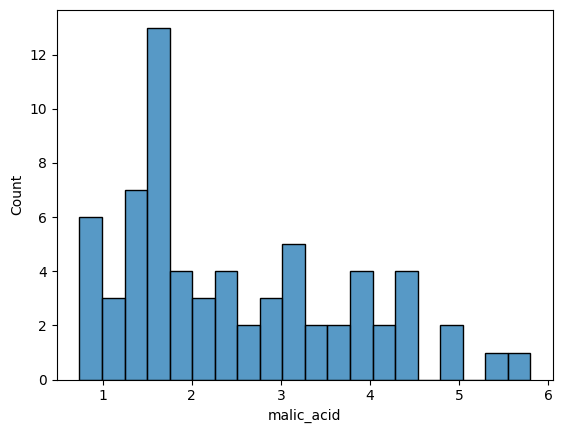

In [16]:
#seabornのhistplot関数によって、ヒストグラムを描画
#dataパラメータに対象のDataFrameを、xパラメータに可視化したい列名を指定
sns.histplot(x='malic_acid', data=df_cluster0, bins=20)

<Axes: xlabel='malic_acid', ylabel='proline'>

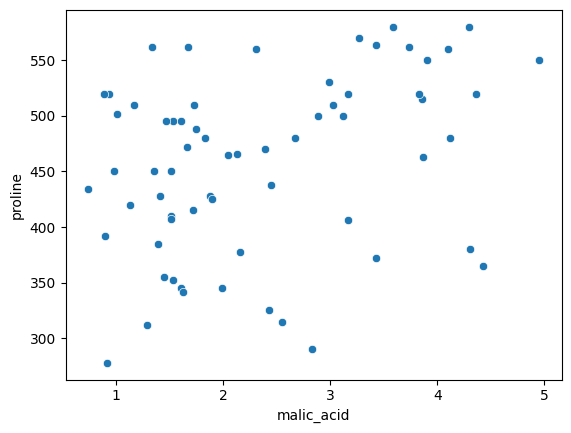

In [20]:
#クラスターのデータをマッピング
sns.scatterplot(x='malic_acid', y='proline',data=df_cluster0.query('`malic_acid` < 5.0'))

In [ ]:
#より高いプロリンとより低いリンゴ酸がワインの条件？